In [1]:
import numpy as np
import pandas as pd
import torch
from sklearn import preprocessing
from model import *
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


## Preprocessing

### Normal

In [3]:
normal = pd.read_csv("datasets/SWaT/SWaT_Dataset_Normal_v1.csv", sep=',')
normal = normal.drop(["Timestamp", "Normal/Attack"], axis=1)
normal.shape

C:\Users\alexr\AppData\Local\Temp\ipykernel_33576\4111822205.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  normal = pd.read_csv("datasets/SWaT/SWaT_Dataset_Normal_v1.csv", sep=',')


(495000, 51)

In [4]:
# France uses commas as decimal separator; convert all columns into floats
for i in list(normal):
    normal[i] = normal[i].apply(lambda x: str(x).replace(',', '.'))
normal = normal.astype(float)

In [5]:
minmax_scaler = preprocessing.MinMaxScaler()

scaled = minmax_scaler.fit_transform(normal)
normal = pd.DataFrame(scaled)

In [6]:
normal.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.0,0.005294,0.5,0.0,0.0,0.012291,0.075099,0.002009,0.0,0.5,...,0.0,0.0,0.0,0.000814,0.0,0.001217,0.000147,0.0,0.0,0.0
1,0.0,0.005407,0.5,0.0,0.0,0.012291,0.075099,0.002009,0.0,0.5,...,0.0,0.0,0.0,0.000814,0.0,0.001217,0.000147,0.0,0.0,0.0
2,0.0,0.005520,0.5,0.0,0.0,0.012291,0.075099,0.002009,0.0,0.5,...,0.0,0.0,0.0,0.000814,0.0,0.001217,0.000147,0.0,0.0,0.0
3,0.0,0.005801,0.5,0.0,0.0,0.012291,0.075099,0.002009,0.0,0.5,...,0.0,0.0,0.0,0.000814,0.0,0.001217,0.000147,0.0,0.0,0.0
4,0.0,0.005576,0.5,0.0,0.0,0.012291,0.075099,0.002009,0.0,0.5,...,0.0,0.0,0.0,0.000814,0.0,0.001217,0.000147,0.0,0.0,0.0


In [7]:
# no null values
normal[normal.isna().any(axis=1)]

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50


### Attack

In [8]:
attack = pd.read_csv("datasets/SWaT/SWaT_Dataset_Attack_v0.csv", sep=';')
labels = [float(label != 'Normal') for label in attack["Normal/Attack"]]
attack = attack.drop(["Timestamp", "Normal/Attack"], axis=1)
attack.shape

C:\Users\alexr\AppData\Local\Temp\ipykernel_33576\672767586.py:1: DtypeWarning: Columns (1,9,28,46) have mixed types. Specify dtype option on import or set low_memory=False.
  attack = pd.read_csv("datasets/SWaT/SWaT_Dataset_Attack_v0.csv", sep=';')


(449919, 51)

In [9]:
# France uses commas as decimal separator; convert all columns into floats
for i in list(attack):
    attack[i] = attack[i].apply(lambda x: str(x).replace(',', '.'))
attack = attack.astype(float)

In [10]:
scaled = minmax_scaler.transform(attack)
attack = pd.DataFrame(scaled)

In [11]:
attack.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.884144,0.577133,1.0,1.0,0.0,0.496158,0.188845,0.064088,0.982899,1.0,...,0.970903,1.0,0.0,0.946125,0.449782,0.944116,0.000073,0.0,0.0,0.0
1,0.891145,0.577190,1.0,1.0,0.0,0.496158,0.188845,0.064088,0.982899,1.0,...,0.970903,1.0,0.0,0.946125,0.449782,0.944521,0.000073,0.0,0.0,0.0
2,0.906779,0.577133,1.0,1.0,0.0,0.496158,0.186209,0.064088,0.981663,1.0,...,0.973530,1.0,0.0,0.946188,0.449782,0.944521,0.000073,0.0,0.0,0.0
3,0.923230,0.577302,1.0,1.0,0.0,0.496158,0.186209,0.064088,0.981663,1.0,...,0.973530,1.0,0.0,0.946188,0.449782,0.944197,0.000073,0.0,0.0,0.0
4,0.935947,0.578034,1.0,1.0,0.0,0.496158,0.186209,0.064088,0.981972,1.0,...,0.973530,1.0,0.0,0.946188,0.449782,0.943629,0.000073,0.0,0.0,0.0


In [12]:
# no null values
attack[attack.isna().any(axis=1)]

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50


In [13]:
window_size = 12

In [14]:
windows_normal = normal.values[np.arange(window_size)[None, :] + np.arange(normal.shape[0] - window_size)[:, None]]
windows_normal.shape

(494988, 12, 51)

In [15]:
windows_attack = attack.values[np.arange(window_size)[None, :] + np.arange(attack.shape[0] - window_size)[:, None]]
windows_attack.shape

(449907, 12, 51)

In [16]:
w_size = windows_normal.shape[1] * windows_normal.shape[2]
z_size = 40 * windows_normal.shape[1]

In [17]:
model = Usad(w_size, z_size).to(device)

## Dataloader

In [18]:
batch_size = 64

In [19]:
train_size = 0.8
val_size = 0.2

# val_size = 0.7
# test_size = 0.3

In [20]:
windows_normal = windows_normal.reshape((windows_normal.shape[0], -1))
windows_attack = windows_attack.reshape((windows_attack.shape[0], -1))

In [21]:
train_dataset, val_dataset = torch.utils.data.random_split(windows_normal, [train_size, val_size])
# val_dataset, test_dataset = torch.utils.data.random_split(windows_attack, [val_size, test_size])
test_dataset = windows_attack

train_dataloader = DataLoader(
    windows_normal,
    batch_size=batch_size,
    shuffle=True
)

val_dataloader = DataLoader(
    val_dataset,
    batch_size=batch_size,
    shuffle=False
)

test_dataloader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False
)

In [22]:
next(iter(train_dataloader)).shape

torch.Size([64, 612])

In [23]:
optimizer1 = torch.optim.Adam(list(model.encoder.parameters()) + list(model.decoder1.parameters()), lr=0.001)
optimizer2 = torch.optim.Adam(list(model.encoder.parameters()) + list(model.decoder2.parameters()), lr=0.001)

In [24]:
def training_step(model, train_dataloader, optimizer1, optimizer2, device, epoch):
    model.train()
    running_loss = np.array([0.0, 0.0])
    batch_bar = tqdm(total=len(train_dataloader), dynamic_ncols=True, leave=False, position=0, desc='Train')

    for iter_id, batch in enumerate(train_dataloader):
        batch = batch.to(dtype=torch.float32, device=device)
        optimizer1.zero_grad()
        optimizer2.zero_grad()

        (loss_AE1, loss_AE2) = model.training_phase(batch, epoch + 1)
        loss_AE1.backward()
        optimizer1.step()

        (loss_AE1, loss_AE2) = model.training_phase(batch, epoch + 1)
        loss_AE2.backward()
        optimizer2.step()
        
        running_loss[0] += loss_AE1.item()
        running_loss[1] += loss_AE2.item()

        batch_bar.set_postfix(
            loss_AE1="{:.04f}".format(running_loss[0] / (iter_id + 1)),
            loss_AE2="{:.04f}".format(running_loss[1] / (iter_id + 1))
        )
        batch_bar.update()

    batch_bar.close()
    return running_loss / len(train_dataloader)

In [25]:
def val_on_normal_dataset(model, val_dataloader, epoch, device):
    model.eval()
    AD_scores = []
    with torch.no_grad():
        for iter_id, batch in enumerate(val_dataloader):
            batch = batch.to(dtype=torch.float32, device=device)
            loss = model.training_phase(batch, epoch + 1)
            loss = [x.item() for x in loss]
            AD_scores.append(loss)
    AD_scores = np.array(AD_scores)
    print(AD_scores)

    return np.mean(AD_scores, axis=0)
    # return AD_scores / len(val_dataloader)

In [32]:
val_on_normal_dataset(model, val_dataloader, 2, device)

[0.0004082832019776106, 0.00042117713019251823]
[0.0005023563280701637, 0.0005096156382933259]
[0.0005218518781475723, 0.0005130720091983676]
[0.0003724580747075379, 0.00037269204040057957]
[0.0005805253749713302, 0.0005781932268291712]
[0.0003984439535997808, 0.0004207697347737849]
[0.0003792119096033275, 0.00037668048753403127]
[0.0003237799392081797, 0.0003261006495449692]
[0.00029527669539675117, 0.00030511856311932206]
[0.0005553240771405399, 0.0005589787615463138]
[0.0004089016292709857, 0.000416396971559152]
[0.0002968104381579906, 0.00030152095132507384]
[0.00043171370634809136, 0.0004091347800567746]
[0.00031556165777146816, 0.0003134060825686902]
[0.0006049488438293338, 0.0006121030310168862]
[0.0002974415256176144, 0.00031432497780770063]
[0.0008212642278522253, 0.0008087762398645282]
[0.00042181293247267604, 0.0004207523015793413]
[0.0004664562875404954, 0.00047026402899064124]
[0.0007519566570408642, 0.0007420099573209882]
[0.000380601326469332, 0.0003911613021045923]
[0.0

array([0.00048413, 0.00048638])

In [25]:
alpha = 0.5
beta = 1.0 - alpha

In [ ]:
def validation_step(model, val_dataloader):
    model.eval()
    AD_scores = []
    with torch.no_grad():
        for iter_id, batch in enumerate(val_dataloader):
            batch = batch.to(dtype=torch.float32, device=device)
            AD_score = model.testing_phase(batch, alpha, beta)
            print(AD_score)
            AD_scores.append(AD_score)
    
    return AD_scores

In [28]:
scores = validation_step(model, val_dataloader)

tensor(0.2600, device='cuda:0')
tensor(0.2195, device='cuda:0')
tensor(0.2387, device='cuda:0')
tensor(0.2075, device='cuda:0')
tensor(0.2168, device='cuda:0')
tensor(0.2321, device='cuda:0')
tensor(0.2208, device='cuda:0')
tensor(0.2200, device='cuda:0')
tensor(0.2394, device='cuda:0')
tensor(0.1938, device='cuda:0')
tensor(0.2257, device='cuda:0')
tensor(0.2399, device='cuda:0')
tensor(0.2486, device='cuda:0')
tensor(0.2639, device='cuda:0')
tensor(0.2288, device='cuda:0')
tensor(0.2016, device='cuda:0')
tensor(0.1978, device='cuda:0')
tensor(0.1916, device='cuda:0')
tensor(0.1825, device='cuda:0')
tensor(0.2226, device='cuda:0')
tensor(0.2379, device='cuda:0')
tensor(0.2478, device='cuda:0')
tensor(0.2200, device='cuda:0')
tensor(0.1797, device='cuda:0')
tensor(0.2465, device='cuda:0')
tensor(0.2408, device='cuda:0')
tensor(0.2426, device='cuda:0')
tensor(0.2245, device='cuda:0')
tensor(0.2170, device='cuda:0')
tensor(0.2204, device='cuda:0')
tensor(0.2011, device='cuda:0')
tensor(0

In [32]:
print(scores)

None


In [ ]:
for e in range(30):
    running_loss = training_step(model, train_dataloader, optimizer1, optimizer2, device, e)
    print(f"epoch: {e}, train_loss_AE1: {running_loss[0]}, train_loss_AE2: {running_loss[1]}")
    val_scores = val_on_normal_dataset(model, val_dataloader, e, device)
    print(f"val_loss_1: {val_scores[0]}, val_loss_2: {val_scores[1]}")

epoch: 0, train_loss_AE1: 0.0014674721737553287, train_loss_AE2: 0.001572728583550968
[[0.001067   0.00115427]
 [0.00057601 0.00054308]
 [0.0004398  0.00039705]
 ...
 [0.0007323  0.00063503]
 [0.00062658 0.00062623]
 [0.00044222 0.00038844]]
val_loss_1: 0.000614663933535632, val_loss_2: 0.0005911874999719628


epoch: 1, train_loss_AE1: 0.000673207397989293, train_loss_AE2: -0.0001523434956326347
[[ 1.28229184e-03 -5.52029931e-04]
 [ 5.76084771e-04 -9.45953216e-05]
 [ 3.45624983e-04 -7.27148436e-05]
 ...
 [ 7.76898698e-04 -2.68968841e-04]
 [ 4.68294485e-04 -1.15045725e-04]
 [ 3.77690885e-04 -9.21857718e-05]]
val_loss_1: 0.0005361051294256848, val_loss_2: -0.0001280076769314921


Train:  14%|█▎        | 1052/7735 [00:07<00:48, 138.57it/s, loss_AE1=0.0011, loss_AE2=-0.0005]

KeyboardInterrupt: 

Train:  14%|█▎        | 1053/7735 [00:26<00:48, 138.57it/s, loss_AE1=0.0011, loss_AE2=-0.0005]

In [29]:
normal_scores = []

for iter_id, batch in enumerate(train_dataloader):
    batch = batch.to(dtype=torch.float32, device=device)
    score = model.testing_phase(batch, alpha, beta)
    normal_scores.append(score)

In [30]:
print(normal_scores)

[tensor(0.0010, device='cuda:0', grad_fn=<AddBackward0>), tensor(0.0013, device='cuda:0', grad_fn=<AddBackward0>), tensor(0.0009, device='cuda:0', grad_fn=<AddBackward0>), tensor(0.0010, device='cuda:0', grad_fn=<AddBackward0>), tensor(0.0011, device='cuda:0', grad_fn=<AddBackward0>), tensor(0.0013, device='cuda:0', grad_fn=<AddBackward0>), tensor(0.0011, device='cuda:0', grad_fn=<AddBackward0>), tensor(0.0009, device='cuda:0', grad_fn=<AddBackward0>), tensor(0.0011, device='cuda:0', grad_fn=<AddBackward0>), tensor(0.0012, device='cuda:0', grad_fn=<AddBackward0>), tensor(0.0009, device='cuda:0', grad_fn=<AddBackward0>), tensor(0.0007, device='cuda:0', grad_fn=<AddBackward0>), tensor(0.0012, device='cuda:0', grad_fn=<AddBackward0>), tensor(0.0016, device='cuda:0', grad_fn=<AddBackward0>), tensor(0.0011, device='cuda:0', grad_fn=<AddBackward0>), tensor(0.0013, device='cuda:0', grad_fn=<AddBackward0>), tensor(0.0013, device='cuda:0', grad_fn=<AddBackward0>), tensor(0.0011, device='cuda:0'

In [23]:
curr_batch = next(iter(train_dataloader)).reshape((64, -1))
curr_batch = curr_batch.to(dtype=torch.float32, device=device)

In [24]:
model.training_phase(curr_batch, 1)

7567.6572265625

In [40]:
for iter_id, batch in enumerate(train_dataloader):
    print(batch.shape)

torch.Size([64, 612])
torch.Size([64, 612])
torch.Size([64, 612])
torch.Size([64, 612])
torch.Size([64, 612])
torch.Size([64, 612])
torch.Size([64, 612])
torch.Size([64, 612])
torch.Size([64, 612])
torch.Size([64, 612])
torch.Size([64, 612])
torch.Size([64, 612])
torch.Size([64, 612])
torch.Size([64, 612])
torch.Size([64, 612])
torch.Size([64, 612])
torch.Size([64, 612])
torch.Size([64, 612])
torch.Size([64, 612])
torch.Size([64, 612])
torch.Size([64, 612])
torch.Size([64, 612])
torch.Size([64, 612])
torch.Size([64, 612])
torch.Size([64, 612])
torch.Size([64, 612])
torch.Size([64, 612])
torch.Size([64, 612])
torch.Size([64, 612])
torch.Size([64, 612])
torch.Size([64, 612])
torch.Size([64, 612])
torch.Size([64, 612])
torch.Size([64, 612])
torch.Size([64, 612])
torch.Size([64, 612])
torch.Size([64, 612])
torch.Size([64, 612])
torch.Size([64, 612])
torch.Size([64, 612])
torch.Size([64, 612])
torch.Size([64, 612])
torch.Size([64, 612])
torch.Size([64, 612])
torch.Size([64, 612])
torch.Size

In [43]:
li = np.array([2.0, 1.0])
print(li / 2)

[1.  0.5]


In [51]:
normal_df = pd.read_csv("datasets/SWaT/SWaT_Dataset_Normal_v1.csv", sep=',')
normal_df.shape

C:\Users\alexr\AppData\Local\Temp\ipykernel_35228\2618999078.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  normal_df = pd.read_csv("datasets/SWaT/SWaT_Dataset_Normal_v1.csv", sep=',')


(495000, 53)

In [ ]:
normal_df.columns.get_loc('LIT301')

19

In [53]:
normal_df = normal_df.drop(["Timestamp", "Normal/Attack"], axis=1)

# France uses commas as decimal separator; convert all columns into floats
for i in list(normal_df):
    normal_df[i] = normal_df[i].apply(lambda x: str(x).replace(',', '.'))
normal_df = normal_df.astype(float)

In [59]:
print(normal_df['LIT301'].shape)

(495000,)


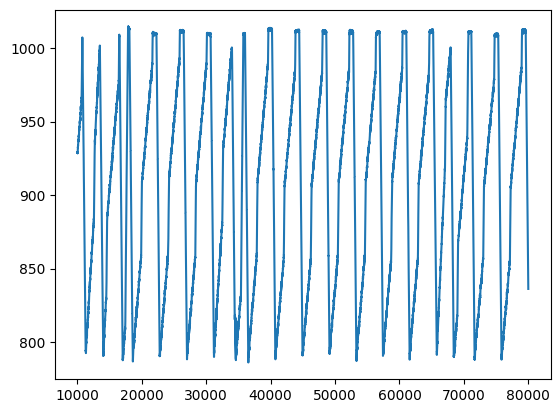

In [67]:
plt.plot(normal_df['LIT301'][10000:80000])